In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import r2_score
from collections import Counter
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [2]:
def do_cross_validation(X, y, model):
    regressor_name = model.__class__.__name__
    fold = KFold(n_splits=10, shuffle=True, random_state=0)
    scores_on_this_split = cross_val_score(estimator=model, X=X,y=y, cv=fold, scoring='r2')
    scores_on_this_split = np.round(scores_on_this_split * 100, 2)
    accuracy = scores_on_this_split.mean()
    print(f'Cross validation for {regressor_name} - {accuracy}')
    return accuracy



In [3]:
def predict(X, y_test, model):
    y = model.predict(X)
    score = round((r2_score(y_test, y) * 100), 2)
    print(f'Score {score}')


In [4]:
df = pd.read_csv('flats2.csv')

In [5]:
df.head(10)

,balcony,walls,total_area,district,age,repair,cost,num_of_stops_1km,num_of_shops_1km,metro,num_of_kindergarden_1km,num_of_medical_1km,num_of_education_1km
0,1.0,0.7,30.0,2.0,56.0,0.8,2250000.0,0.0,0.0,749.751342,14.0,0.0,0.0
1,0.0,1.0,32.0,2.0,60.0,0.8,2090000.0,0.0,0.0,268.296095,13.0,0.0,0.0
2,0.0,0.9,42.0,1.0,2.0,1.0,2800000.0,0.0,0.0,1116.997438,7.0,1.0,1.0
3,1.0,0.7,34.0,3.0,18.0,0.8,2000000.0,0.0,0.0,7834.137018,4.0,0.0,0.0
4,1.0,0.7,34.0,2.0,13.0,1.0,2630000.0,0.0,0.0,1597.943201,12.0,0.0,0.0
5,1.0,0.9,43.0,2.0,6.0,0.7,2950000.0,0.0,0.0,6041.387354,5.0,1.0,0.0
6,1.0,0.9,43.0,2.0,3.0,1.0,2950000.0,0.0,0.0,4500.203545,0.0,0.0,0.0
7,1.0,0.7,35.0,2.0,37.0,1.0,2850000.0,0.0,0.0,4361.573945,10.0,1.0,0.0
8,1.0,0.9,33.0,1.0,9.0,0.8,3800000.0,0.0,0.0,185.973887,13.0,0.0,0.0
9,1.0,1.0,48.0,0.0,2.0,0.6,5250000.0,0.0,0.0,1121.358786,9.0,1.0,1.0


In [6]:
df.describe()

,balcony,walls,total_area,district,age,repair,cost,num_of_stops_1km,num_of_shops_1km,metro,num_of_kindergarden_1km,num_of_medical_1km,num_of_education_1km
count,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2.020000e+03,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
mean,0.823762,0.885198,35.801980,1.768812,21.821782,0.808515,2.800513e+06,0.076733,0.357426,3288.308324,8.244059,0.450990,0.112871
std,0.408709,0.116681,6.953564,0.850090,21.020001,0.140285,7.531591e+05,0.266233,1.442292,2337.891887,6.190179,0.497715,0.316514
min,0.000000,0.400000,20.000000,0.000000,0.000000,0.600000,7.800000e+05,0.000000,0.000000,45.716934,0.000000,0.000000,0.000000
25%,1.000000,0.800000,31.000000,1.000000,4.000000,0.700000,2.300000e+06,0.000000,0.000000,1222.742207,3.000000,0.000000,0.000000
50%,1.000000,0.900000,35.000000,2.000000,11.000000,0.800000,2.680000e+06,0.000000,0.000000,2745.077546,8.000000,0.000000,0.000000
75%,1.000000,1.000000,40.000000,2.000000,42.000000,1.000000,3.108000e+06,0.000000,0.000000,5212.114853,12.000000,1.000000,0.000000
max,3.000000,1.000000,59.000000,4.000000,94.000000,1.000000,5.300000e+06,1.000000,11.000000,11697.172979,31.000000,1.000000,1.000000


In [7]:
y = df.cost
X = df.drop(columns=['cost'])

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model =   regressor.fit(X_train, y_train)
do_cross_validation(X_test, y_test, model)

Cross validation for LinearRegression - 74.93300000000002


74.93300000000002

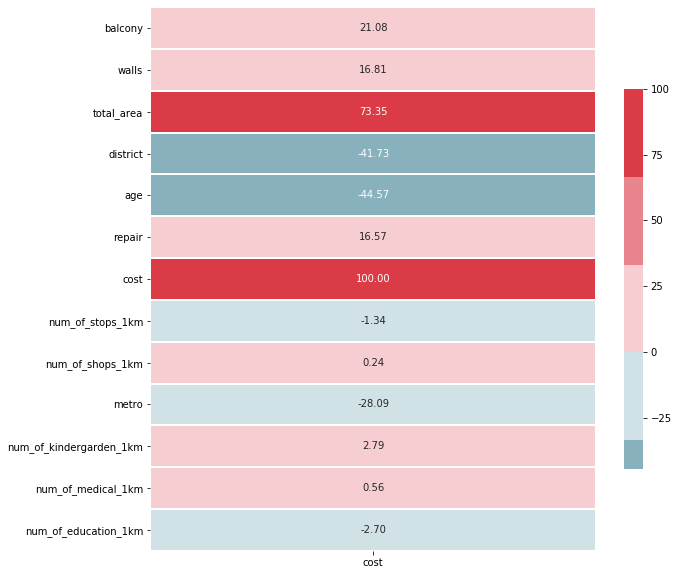

In [10]:
plot.figure(figsize=(10,10))
corr = df.corr()*100.0
sns.heatmap(corr[['cost']],
            cmap= sns.diverging_palette(220, 10),
            center=0,
            linewidths=1, cbar_kws={"shrink": .7}, annot=True,
            fmt=".2f")

Cross validation for DecisionTreeRegressor - 36.626
Cross validation for DecisionTreeRegressor - 57.265
Cross validation for DecisionTreeRegressor - 66.85400000000001
Cross validation for DecisionTreeRegressor - 71.98300000000002
Cross validation for DecisionTreeRegressor - 75.626
Cross validation for DecisionTreeRegressor - 77.18300000000002
Cross validation for DecisionTreeRegressor - 77.053
Cross validation for DecisionTreeRegressor - 77.89500000000001
Cross validation for DecisionTreeRegressor - 76.74199999999999
Cross validation for DecisionTreeRegressor - 77.08700000000002
Cross validation for DecisionTreeRegressor - 75.03699999999999
Cross validation for DecisionTreeRegressor - 75.926
Cross validation for DecisionTreeRegressor - 74.56800000000001
Cross validation for DecisionTreeRegressor - 75.382
Cross validation for DecisionTreeRegressor - 74.26199999999999
Cross validation for DecisionTreeRegressor - 74.538
Cross validation for DecisionTreeRegressor - 74.3
Cross validation fo

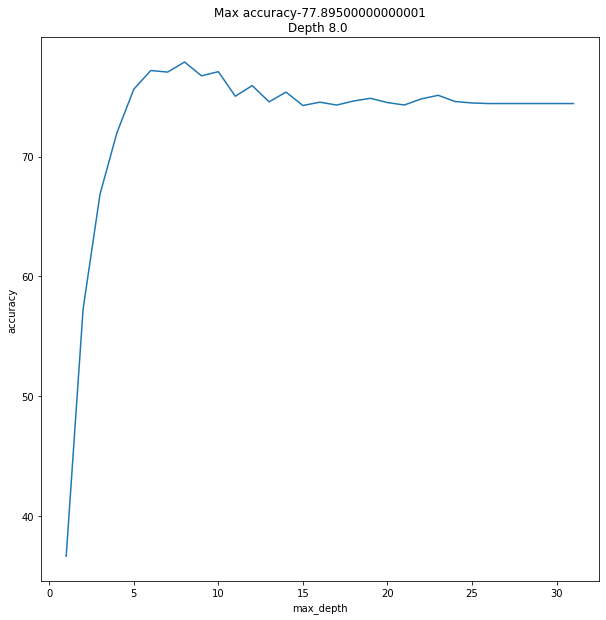

In [11]:
from sklearn.tree import DecisionTreeRegressor

data = []
for x in range(1, 32):
    regressor = DecisionTreeRegressor(max_depth=x, random_state=42)
    model = regressor.fit(X_train, y_train)
    accuracy = do_cross_validation(X, y, model)
    data.append({'max_depth': x, 'accuracy': accuracy})

data = pd.DataFrame(data)
max_result = data.iloc[data['accuracy'].idxmax()]
print(max_result.max_depth)

f, ax = plot.subplots(figsize=(10, 10))
ax.set_title(f'Max accuracy-{max_result.accuracy}\nDepth {max_result.max_depth} ')
sns.lineplot(x="max_depth", y="accuracy", data=data)



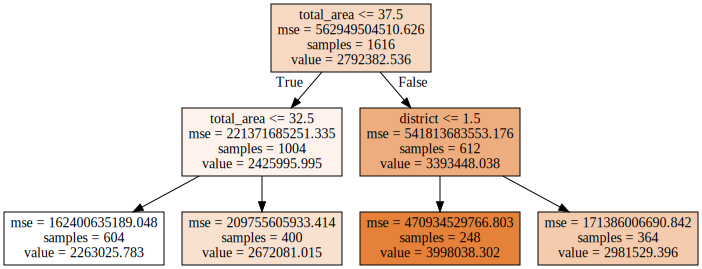

In [12]:
from IPython.core.display import Image, SVG
from sklearn.tree import  export_graphviz
from graphviz import Source
two_level_regressor = DecisionTreeRegressor(max_depth=2, random_state=42)
two_level_regressor = two_level_regressor.fit(X_train, y_train)
graph = Source(export_graphviz(two_level_regressor, out_file=None
   , feature_names=X.columns
   , filled = True))
svg = graph.pipe(format='svg')
SVG(svg)


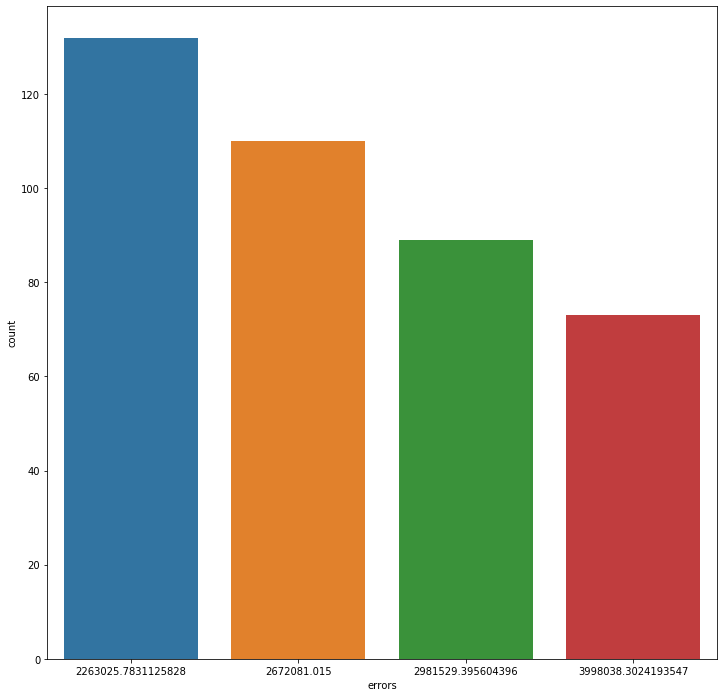

In [13]:
pred_y = two_level_regressor.predict(X_test)
errors = pd.DataFrame(data=pred_y,columns=['errors'])
f, ax = plot.subplots(figsize=(12, 12))
sns.countplot(x="errors", data=errors)

Cross validation for RandomForestRegressor - 42.186
Cross validation for RandomForestRegressor - 64.974
Cross validation for RandomForestRegressor - 72.93
Cross validation for RandomForestRegressor - 77.033
Cross validation for RandomForestRegressor - 79.97
Cross validation for RandomForestRegressor - 81.96000000000001
Cross validation for RandomForestRegressor - 83.611
Cross validation for RandomForestRegressor - 84.586
Cross validation for RandomForestRegressor - 85.44300000000001
Cross validation for RandomForestRegressor - 85.896
Cross validation for RandomForestRegressor - 86.246
Cross validation for RandomForestRegressor - 86.39399999999999
Cross validation for RandomForestRegressor - 86.711
Cross validation for RandomForestRegressor - 86.58099999999999
Cross validation for RandomForestRegressor - 86.592
Cross validation for RandomForestRegressor - 86.712
Cross validation for RandomForestRegressor - 86.662
Cross validation for RandomForestRegressor - 86.667
Cross validation for R

Text(0.5, 1.0, 'Max accuracy-86.712\nDepth 16.0 ')

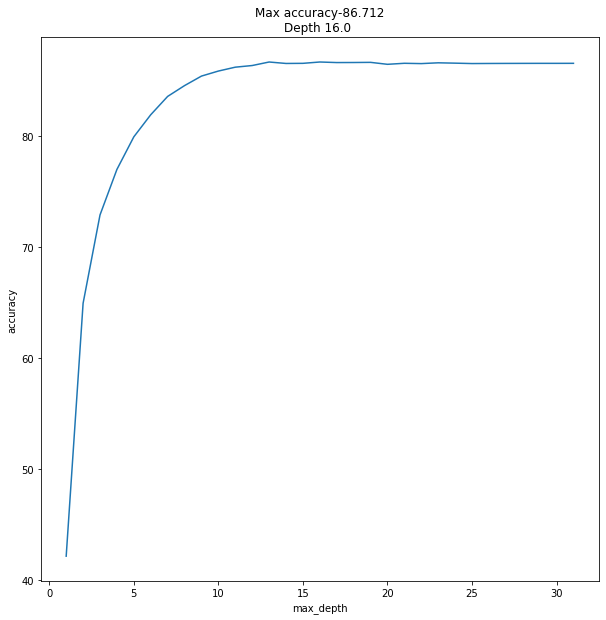

In [14]:
from sklearn.ensemble import RandomForestRegressor
data = []
for x in range(1,32):
    regressor = RandomForestRegressor(random_state=42, max_depth=x,
                                      n_estimators=128,max_features=6)
    model =   regressor.fit(X_train, y_train)
    accuracy = do_cross_validation(X, y, model)
    data.append({'max_depth':x,'accuracy':accuracy})
data = pd.DataFrame(data)
f, ax = plot.subplots(figsize=(10, 10))
sns.lineplot(x="max_depth", y="accuracy", data=data)
max_result = data.loc[data['accuracy'].idxmax()]

ax.set_title(f'Max accuracy-{max_result.accuracy}\nDepth {max_result.max_depth} ')

In [15]:
regressor = RandomForestRegressor(random_state=42, max_depth=16, n_estimators=128,max_features=6)
model =   regressor.fit(X_train, y_train)
accuracy = do_cross_validation(X, y, model)



Cross validation for RandomForestRegressor - 86.712


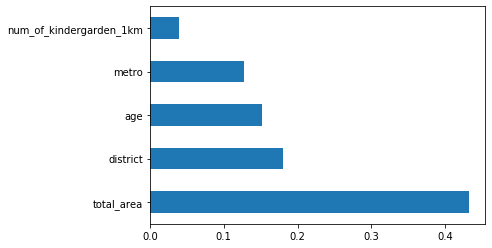

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')